# 機器學習兩大方式：

1.監督式學習 (ex.SVM)

2.非監督式學習(沒有正確答案，電腦自行學習。)

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## SVM：
找到最好的超曲面將資料切割分類

~~~模擬版資料做svm

In [2]:
x = np.array([[6,6], [10,8], [3,7], [8,7]])
x

array([[ 6,  6],
       [10,  8],
       [ 3,  7],
       [ 8,  7]])

In [3]:
x[:, 0]

array([ 6, 10,  3,  8])

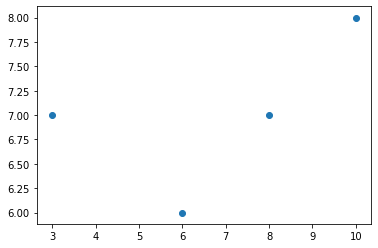

In [4]:
plt.scatter(x[:,0], x[:,1])

In [5]:
y = np.array([1,2,1,2])

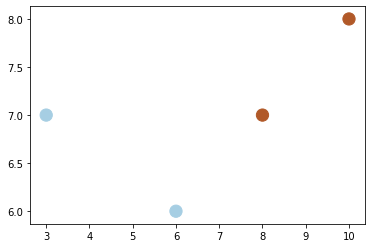

In [6]:
plt.scatter(x[:,0], x[:,1],c=y, cmap="Paired",s=150) ##可以找其他的colormap

stpe1：打開函數學習機

In [7]:
from sklearn.svm import SVC ##C：分類器(Classfile)

In [8]:
clf = SVC(gamma="auto") ##gamma=auto消掉警告

step2：學習

In [9]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

step3：預測

In [10]:
y_predict = clf.predict(x)

In [11]:
y_predict

array([1, 2, 1, 2])

In [12]:
xr = np.random.rand(100)*7+3 ##(讓出來的數字在7~10之間)
yr = np.random.rand(100)*2+6

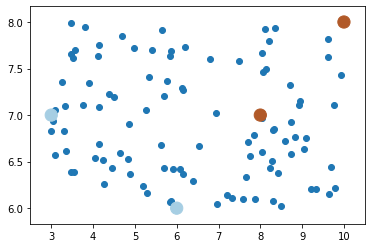

In [13]:
plt.scatter(xr,yr)
plt.scatter(x[:,0], x[:,1], c=y,cmap="Paired", s=150)

In [14]:
print("X",xr[:5])
print("Y",yr[:5])

X [4.702902   8.22049549 3.46237276 8.82672416 5.29062133]
Y [7.84826743 6.43579816 6.39248128 6.75976949 6.16792517]


In [15]:
## np.c_：按行連接兩個矩陣，左右相加，類似pandas中的merge()
##(np.r_：按列上下相加，類似pandas中的concat())
X = np.c_[xr,yr]

In [16]:
Y = clf.predict(X)

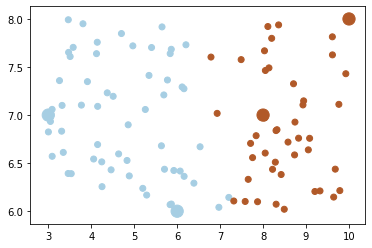

In [17]:
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s=150)
plt.scatter(X[:,0], X[:,1], c=Y, cmap="Paired")

### 結果呈現

In [18]:
x_list = np.linspace(3, 10, 50)
y_list = np.linspace(6, 8, 50)

**錯誤示範：使用np.c_[]畫出座標圖

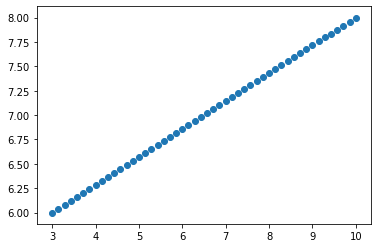

In [19]:
W = np.c_[x_list, y_list]
plt.scatter(W[:,0], W[:,1])

正確處理方法：meshgrid(x,y)

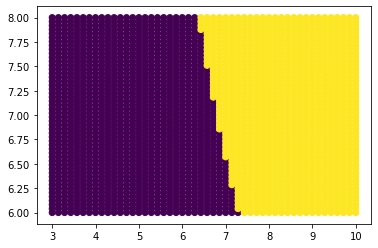

In [20]:
##另外一種呈現方式：
X, Y = np.meshgrid(x_list,y_list)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0],P[:,1], c=C)

### 插播：contour的用法(等高線)

In [21]:
##用meshgrid畫出來
xL = np.array([1,2,3,4])
yL = np.array([5,6,7,8])
X, Y = np.meshgrid(xL, yL)

In [22]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [23]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

In [24]:
Z = np.random.randint(1, 3, (4,4))

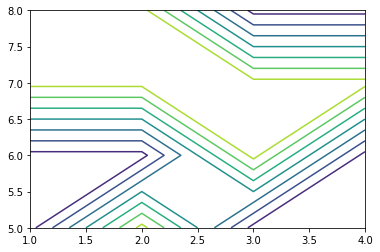

In [25]:
plt.contour(X, Y, Z)

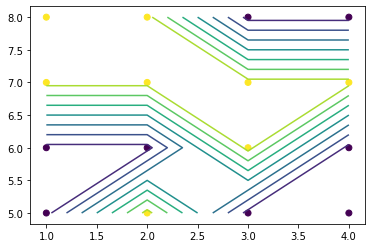

In [26]:
##畫出所有的點看看
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())
plt.contour(X, Y, Z)

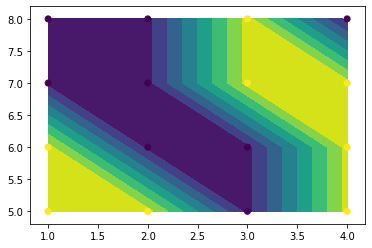

In [27]:
##把contour加上f......
Z = np.random.randint(1, 3, (4,4))
plt.contourf(X, Y, Z)
plt.scatter(X.ravel(), Y.ravel(), c=Z.ravel())

### 終極版!資料視覺化：

In [28]:
x_arr = np.arange(2.5, 10.5, 0.02)
y_arr = np.arange(5.5, 8.5, 0.02)
X, Y = np.meshgrid(x_arr, y_arr) ##結合兩資料(?)
P = np.c_[X.ravel(), Y.ravel()] ##拉平、結合
z = clf.predict(P)

In [29]:
clf.predict(P)

array([1, 1, 1, ..., 2, 2, 2])

In [30]:
## 檢查
X.shape

(150, 400)

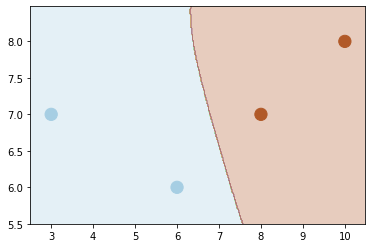

In [31]:
Z = z.reshape(X.shape)
plt.contourf(X, Y, Z, cmap="Paired", alpha= 0.3) ##alpha=透明度
plt.scatter(x[:,0], x[:,1], c=y, cmap="Paired", s=150)

# SVM實例分析：鳶尾花分類

1.讀入鳶尾花數據庫

In [38]:
from sklearn.datasets import load_iris

In [42]:
iris = load_iris()

In [44]:
##想知道資料細節的話：
print(iris.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [46]:
x = iris.data ##輸入
y = iris.target  ##輸出

In [47]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [48]:
y[:5]

array([0, 0, 0, 0, 0])

In [62]:
#x取兩個feature

X = x[:, :2]

In [63]:
Y = y
##X, Y是我們選取出來的資料

In [64]:
len(X)

150

## 區分訓練資料、測試資料

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 374)
#讀四組變數(x_train........)=訓練測試分開、test size與randomstate讓每次不會重新抓取資料

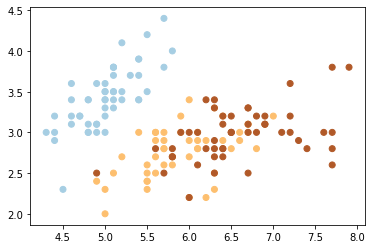

In [68]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap="Paired")

step1.開一台空的函數學習機：

In [70]:
clf = SVC(gamma="auto") ##gamma以防警告

step2.訓練：

In [71]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

step3.預測：

In [72]:
y_predict = clf.predict(x_test)

In [73]:
y_predict

array([0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 0, 2])

In [74]:
## 檢查
y_test

array([0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1,
       1, 2, 2, 1, 1, 1, 0, 1])

In [75]:
##試驗答對率：相減
y_predict - y_test

array([ 0,  0,  0,  0, -1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  1,  0, -2,  0,  0,  0,  0,  1])

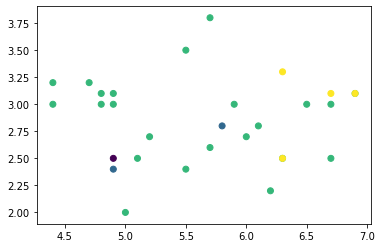

In [76]:
plt.scatter(x_test[:,0], x_test[:,1],c=y_predict - y_test)

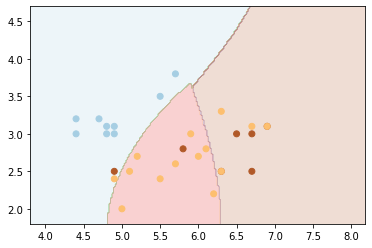

In [79]:
x0 = np.arange(3.8, 8.2, 0.02) ##每隔0.02要娶一個點
y0 = np.arange(1.8, 4.7, 0.02)

xm, ym = np.meshgrid(x0, y0) ##結合
P = np.c_[xm.ravel(), ym.ravel()] ##拉平
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap="Paired", alpha=0.2)

plt.scatter(x_test[:,0], x_test[:,1], cmap="Paired",c=y_test) ##區塊色是預測結果、點點是正確答案

### 預測結果不太精確

In [ ]:
print(xm, ym)